In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
worldcup_stats = pd.read_csv('/Users/maulikthakkar/Downloads/CWCStats.csv')
results = pd.read_csv('/Users/maulikthakkar/Downloads/ResultsODI.csv')

In [3]:
results

,Team_1,Team_2,Winner
0,Bangladesh,Pakistan,Bangladesh
1,Bangladesh,Pakistan,Bangladesh
2,Bangladesh,Pakistan,Bangladesh
3,Ireland,England,No result
4,Pakistan,Zimbabwe,Pakistan
...,...,...,...
717,Netherlands,Scotland,Netherlands
718,Sri Lanka,West Indies,Sri Lanka
719,Bangladesh,Afghanistan,Afghanistan
720,Netherlands,Sri Lanka,Sri Lanka


In [4]:
worldcup_stats

,Teams,Previous_Apperance,Previous_Titles,Previous_Finals,Previous_SemiFinals,Rankings
0,India,12,2,3,7,1
1,Pakistan,12,1,2,6,2
2,Australia,12,5,6,8,3
3,South Africa,7,0,0,4,4
4,England,12,1,4,6,5
5,New Zealand,12,0,2,8,6
6,Bangladesh,6,0,0,0,7
7,Sri Lanka,12,1,3,4,8
8,Afghanistan,2,0,0,0,9
9,Netherlands,4,0,0,0,10


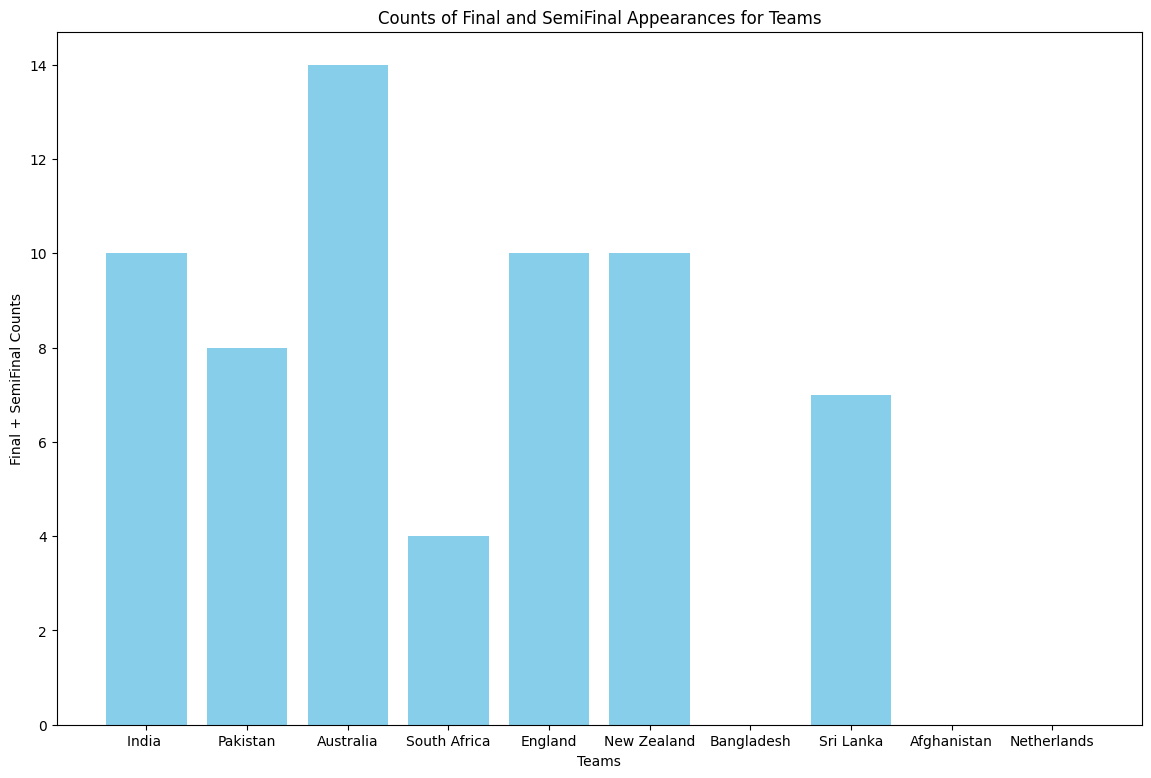

In [5]:
df = pd.DataFrame(worldcup_stats)

df['Final_SemiFinal_Count'] = df['Previous_Finals'] + df['Previous_SemiFinals']

# Bar graph for Final + SemiFinal Counts
plt.figure(figsize=(14, 9))
plt.bar(df['Teams'], df['Final_SemiFinal_Count'], color='skyblue')
plt.xlabel('Teams')
plt.ylabel('Final + SemiFinal Counts')
plt.title('Counts of Final and SemiFinal Appearances for Teams')
plt.show()

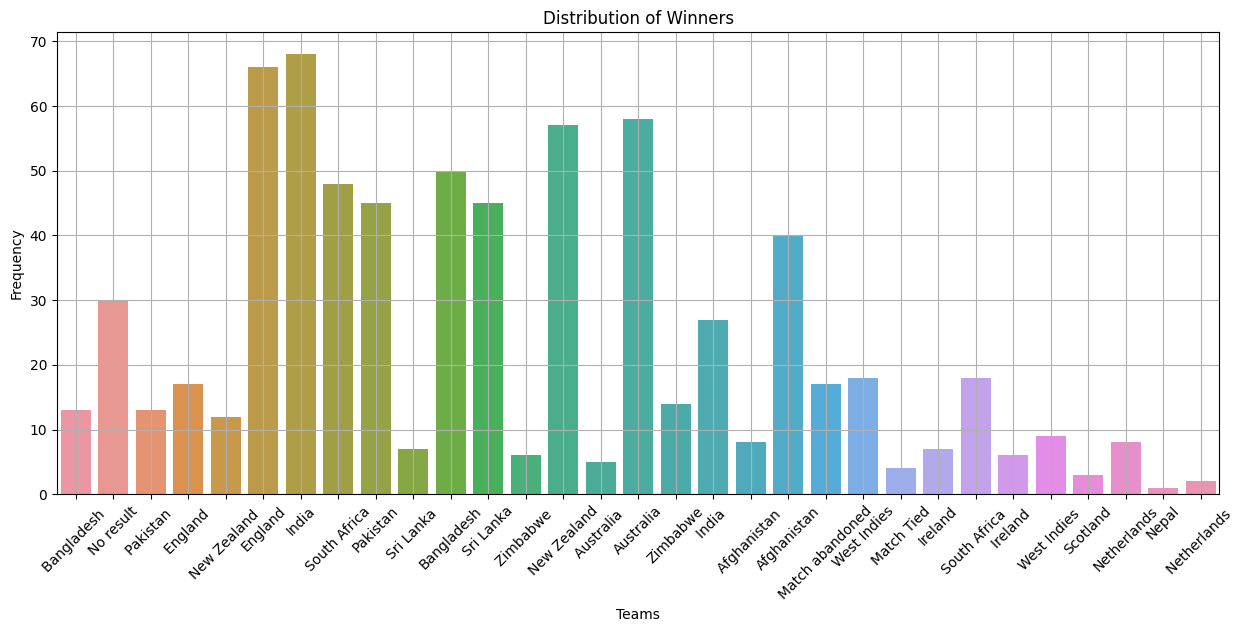

In [6]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Winner', data=results)
plt.title('Distribution of Winners')
plt.xlabel('Teams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [7]:
results.head()

,Team_1,Team_2,Winner
0,Bangladesh,Pakistan,Bangladesh
1,Bangladesh,Pakistan,Bangladesh
2,Bangladesh,Pakistan,Bangladesh
3,Ireland,England,No result
4,Pakistan,Zimbabwe,Pakistan


In [8]:
results.isnull().sum()

Team_1    0
Team_2    0
Winner    0
dtype: int64

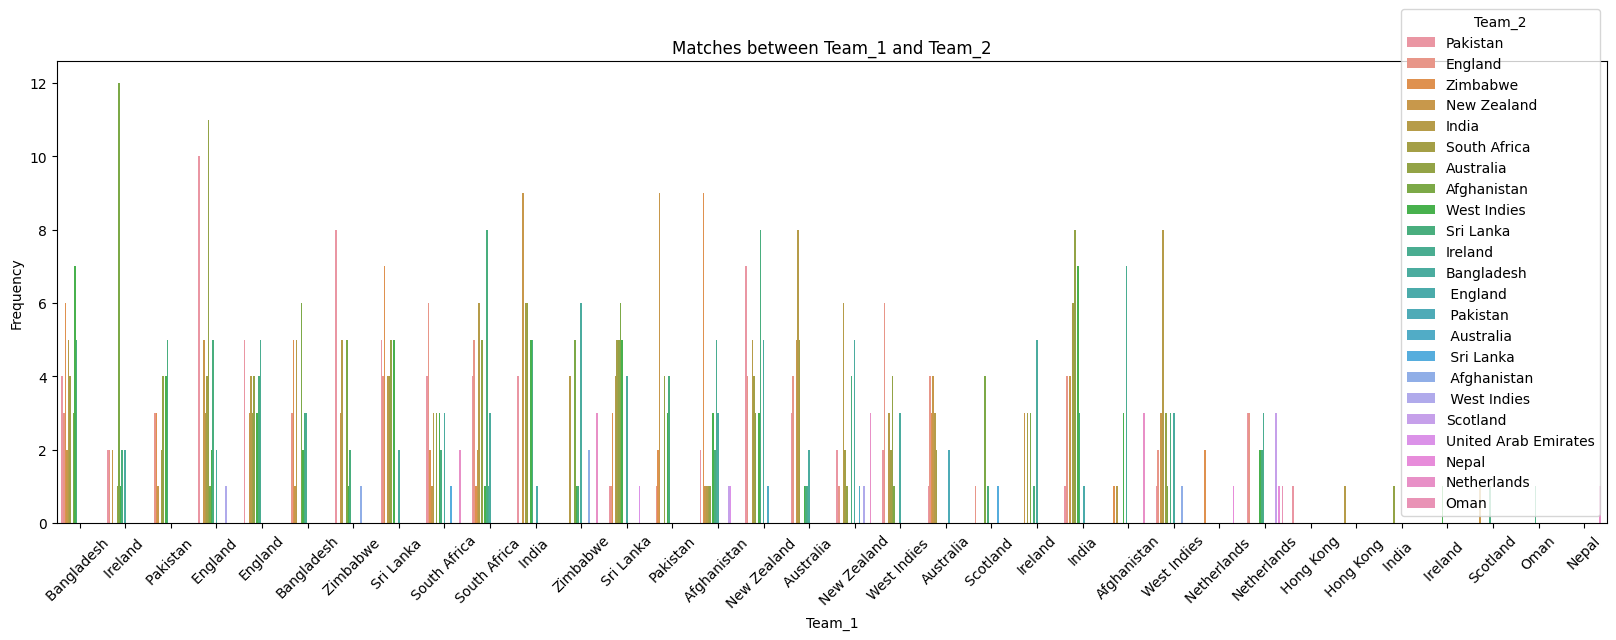

In [9]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Team_1', hue='Team_2', data=results)
plt.title('Matches between Team_1 and Team_2')
plt.xlabel('Team_1')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Team_2')
plt.show()

In [10]:
Rankings = pd.read_csv('/Users/maulikthakkar/Downloads/Ranking.csv') 

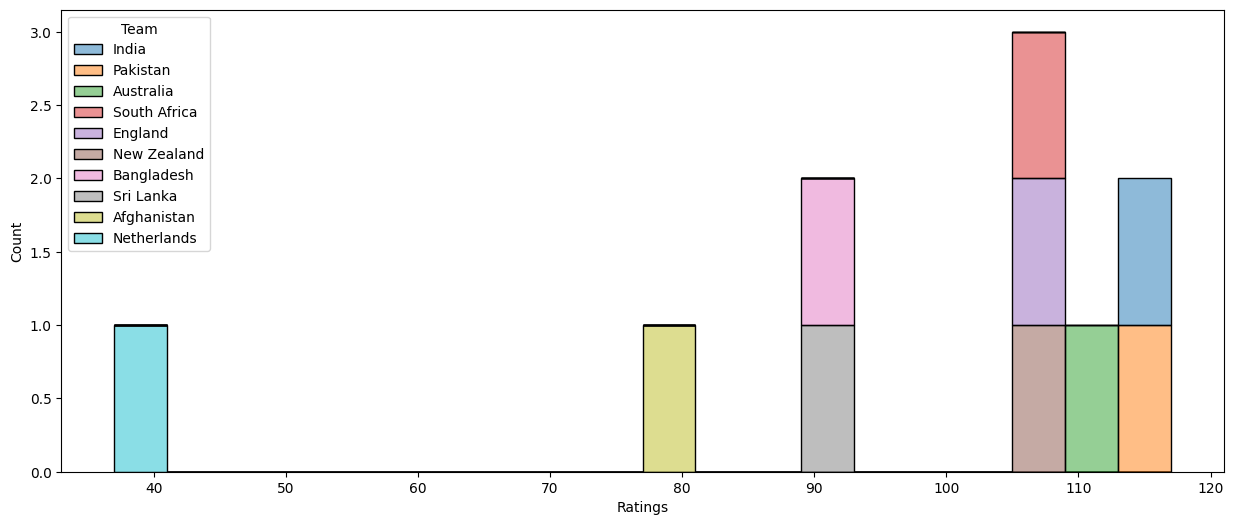

In [11]:
plt.figure(figsize=(15, 6))
hist = sns.histplot(data=Rankings, x='Ratings', bins=20, kde=True, hue='Team', multiple='stack')

handles, labels = hist.get_legend_handles_labels()
plt.show()

In [12]:
# Removing teams which are not part of current World Cup
worldcup_teams = ['England', 'South Africa', 'Netherlands', 
            'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 
            'Australia', 'Bangladesh', 'India']
df_teams_1 = results[results['Team_1'].isin(worldcup_teams)]
df_teams_2 = results[results['Team_2'].isin(worldcup_teams)]
df_teams_all_time = pd.concat((df_teams_1, df_teams_2))
df_teams_all_time.drop_duplicates()
df_teams_all_time.count()

Team_1    826
Team_2    826
Winner    826
dtype: int64

In [13]:
df_teams_all_time.head()

,Team_1,Team_2,Winner
8,England,New Zealand,New Zealand
11,Bangladesh,India,Bangladesh
29,South Africa,New Zealand,South Africa
35,England,Australia,England
53,Sri Lanka,West Indies,Sri Lanka


In [14]:
# Converting df into one-hot encoded format.
final = pd.get_dummies(df_teams_all_time, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])
# Separate X and y sets
X = final.drop(['Winner'], axis=1)
y = final["Winner"]
# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [15]:
final.head()

,Winner,Team_1_Afghanistan,Team_1_Afghanistan,Team_1_Australia,Team_1_Australia,Team_1_Bangladesh,Team_1_Bangladesh,Team_1_England,Team_1_England,Team_1_Hong Kong,...,Team_2_Netherlands,Team_2_New Zealand,Team_2_Oman,Team_2_Pakistan,Team_2_Scotland,Team_2_South Africa,Team_2_Sri Lanka,Team_2_United Arab Emirates,Team_2_West Indies,Team_2_Zimbabwe
8,New Zealand,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
11,Bangladesh,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29,South Africa,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
35,England,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
53,Sri Lanka,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [16]:
# Hyperparametr tuning using grid search for Random Forest Classifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

param_grid = {
    'n_estimators': [50, 100, 150 , 200 , 250],
    'max_depth': [10, 20, 30 , 40 , 50],
}
rf = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 40, 'n_estimators': 250}


In [17]:
best_rf = grid_search.best_estimator_

train_score = best_rf.score(X_train, y_train)
print("Training Set Accuracy:", train_score)
test_score = best_rf.score(X_test, y_test)
print("Test Set Accuracy:", test_score)

Training Set Accuracy: 0.7041522491349481
Test Set Accuracy: 0.5120967741935484


In [18]:
# Taking ICC ranking into consideration

Fix = pd.read_csv('/Users/maulikthakkar/Downloads/fixtures.csv')
Fix.insert(1, 'first_position', Fix['Team_1'].map(Rankings.set_index('Team')['Pos']))
Fix.insert(2, 'second_position', Fix['Team_2'].map(Rankings.set_index('Team')['Pos']))

In [19]:
# Taking team with better rank as team1

pred_set=[]
for index, row in Fix.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})
    else:
        pred_set.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
pred_set_cp = pred_set
pred_set.head()

,Team_1,Team_2,winning_team
0,England,New Zealand,None
1,Pakistan,Netherlands,None
2,Bangladesh,Afghanistan,None
3,South Africa,Sri Lanka,None
4,India,Australia,None


In [20]:
# Encoding in one-hot form
pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

# Adding missing columns
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]


pred_set = pred_set.drop(['Winner'], axis=1)
pred_set.head()

,Team_1_Afghanistan,Team_1_Afghanistan,Team_1_Australia,Team_1_Australia,Team_1_Bangladesh,Team_1_Bangladesh,Team_1_England,Team_1_England,Team_1_Hong Kong,Team_1_Hong Kong,...,Team_2_Netherlands,Team_2_New Zealand,Team_2_Oman,Team_2_Pakistan,Team_2_Scotland,Team_2_South Africa,Team_2_Sri Lanka,Team_2_United Arab Emirates,Team_2_West Indies,Team_2_Zimbabwe
0,False,0,False,0,False,0,True,0,0,0,...,False,True,0,False,0,False,False,0,0,0
1,False,0,False,0,False,0,False,0,0,0,...,True,False,0,False,0,False,False,0,0,0
2,False,0,False,0,True,0,False,0,0,0,...,False,False,0,False,0,False,False,0,0,0
3,False,0,False,0,False,0,False,0,0,0,...,False,False,0,False,0,False,True,0,0,0
4,False,0,False,0,False,0,False,0,0,0,...,False,False,0,False,0,False,False,0,0,0


In [21]:
# Creating Points Table
points_table_df = pd.DataFrame(columns=['Team', 'Matches', 'Won', 'Lost', 'Points'])
points_table_df.set_index('Team', inplace=True)
for team in worldcup_teams:
    points_table_df.loc[team] = [0, 0, 0, 0]
points_table_df

,Matches,Won,Lost,Points
Team,,,,
England,0,0,0,0
South Africa,0,0,0,0
Netherlands,0,0,0,0
Pakistan,0,0,0,0
New Zealand,0,0,0,0
Sri Lanka,0,0,0,0
Afghanistan,0,0,0,0
Australia,0,0,0,0
Bangladesh,0,0,0,0


In [22]:
predictions = best_rf.predict(pred_set)
for i in range(Fix.shape[0]):
    team1 = pred_set_cp.iloc[i, 1]
    team2 = pred_set_cp.iloc[i, 0]
    print(team1 + " VS " + team2)
    if predictions[i] == 1:
        print("Winner: " + team1)
        points_table_df.loc[team1, 'Won'] += 1
        points_table_df.loc[team2, 'Lost'] += 1
        points_table_df.loc[team1, 'Points'] += 2
    else:
        print("Winner: " + team2)
        points_table_df.loc[team2, 'Won'] += 1
        points_table_df.loc[team1, 'Lost'] += 1
        points_table_df.loc[team2, 'Points'] += 2
    print("")

New Zealand VS England
Winner: England

Netherlands VS Pakistan
Winner: Pakistan

Afghanistan VS Bangladesh
Winner: Bangladesh

Sri Lanka VS South Africa
Winner: South Africa

Australia VS India
Winner: India

Netherlands VS New Zealand
Winner: New Zealand

Bangladesh VS England
Winner: England

Sri Lanka VS Pakistan
Winner: Pakistan

Afghanistan VS India
Winner: India

South Africa VS Australia
Winner: Australia

Bangladesh VS New Zealand
Winner: New Zealand

Pakistan VS India
Winner: India

Afghanistan VS England
Winner: England

Sri Lanka VS Australia
Winner: Australia

Netherlands VS South Africa
Winner: South Africa

Afghanistan VS New Zealand
Winner: New Zealand

Bangladesh VS India
Winner: India

Australia VS Pakistan
Winner: Pakistan

Netherlands VS Sri Lanka
Winner: Sri Lanka

England VS South Africa
Winner: South Africa

New Zealand VS India
Winner: India

Afghanistan VS Pakistan
Winner: Pakistan

Bangladesh VS South Africa
Winner: South Africa

Netherlands VS Australia
Winne

In [23]:
points_table_df = points_table_df.sort_values(by='Points', ascending=False)
print(points_table_df)

              Matches  Won  Lost  Points
Team                                    
India               0    9     0      18
Pakistan            0    8     1      16
Australia           0    7     2      14
South Africa        0    6     3      12
England             0    5     4      10
New Zealand         0    4     5       8
Bangladesh          0    3     6       6
Sri Lanka           0    2     7       4
Afghanistan         0    1     8       2
Netherlands         0    0     9       0


In [24]:
semi = [('India', 'South Africa'),
            ('Pakistan', 'Australia')]

In [25]:
def predict(matches, ranking, final, model):

    pos = []

    # Loop for finding position of each team according to ICC ranking
    for match in matches:
        pos.append(ranking.loc[ranking['Team'] == match[0],'Pos'].iloc[0])
        pos.append(ranking.loc[ranking['Team'] == match[1],'Pos'].iloc[0])
    
    pred_set = []
    i = 0
    j = 0

    # 'i' will be the iterator for the 'pos' list, and 'j' for the list of matches (list of tuples)
    while i < len(pos):
        dict = {}
        # If position of first team is better then this team will be the 'Team_1' team, and vice-versa
        if pos[i] < pos[i + 1]:
            dict.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

        pred_set.append(dict)
        i += 2
        j += 1
        
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # One hot encoding
    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

    # Adding missing columns 
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    pred_set = pred_set.drop(['Winner'], axis=1)

    predictions = model.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " VS " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")

In [26]:
predict(semi, Rankings, final, best_rf)

South Africa VS India
Winner: India

Australia VS Pakistan
Winner: Pakistan



In [27]:
finals = [('India', 'Pakistan')]
print("Final")
print()
predict(finals, Rankings, final, best_rf)

Final

Pakistan VS India
Winner: India

